In [3]:
import pandas as pd

dataset_path = '../utils/dataset.csv'

# Load dataset
df = pd.read_csv(dataset_path)

# Quick look at the first rows
print(df.head())



   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [4]:
# Dataset info and stats
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
# Drop the 'Unnamed: 0' index column
df = df.drop(columns=['Unnamed: 0'])

In [6]:
print(df[['artists', 'album_name', 'track_name']].isnull().sum())

artists       1
album_name    1
track_name    1
dtype: int64


In [ ]:
df = df.dropna(subset=['artists', 'album_name', 'track_name'])

In [8]:
print(df.isnull().sum())

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


#### see songs whose duration < 20 s

In [10]:
# Filter tracks with zero or suspiciously low duration (e.g., less than 10 seconds)
suspect_duration = df[df['duration_ms'] <= 20000]

# Show how many such tracks there are
print(f"Number of tracks with duration <= 10 seconds: {len(suspect_duration)}")

# Preview these tracks
print(suspect_duration[['track_id', 'track_name', 'duration_ms', 'artists']].head(10))


Number of tracks with duration <= 10 seconds: 6
                     track_id  \
16288  1T5QvLF9lO4HO3OZQbaX9p   
16856  5YKCM3jbJ8lqUXUwfU7KwZ   
39233  1T5QvLF9lO4HO3OZQbaX9p   
59310  6hsyfegVY5yklJneM40mWi   
59775  1HVjSh7scH1PaPiLjy2LEu   
59812  38Ogh3rsHba83kXx13gbKs   

                                              track_name  duration_ms  \
16288  Carnaval, Op. 9: No. 20, Pause (Live in Japan,...        17826   
16856                          Andante in C Major, K. 1a        17453   
39233  Carnaval, Op. 9: No. 20, Pause (Live in Japan,...        17826   
59310                             The Exorsism Begins...         8586   
59775  Screams for a Finale! (feat. Leila's Opera Class)        15800   
59812                                                V-4        13386   

                                      artists  
16288        Robert Schumann;Pavel Nersessian  
16856  Wolfgang Amadeus Mozart;Ingrid Haebler  
39233        Robert Schumann;Pavel Nersessian  
59310           

### There are only 6. Let's get rid of them.

In [11]:
df = df[df['duration_ms'] > 20000]

In [12]:
# Reset index after dropping rows
df = df.reset_index(drop=True)

In [13]:
print(df.dtypes)

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


### Convert "track_genre" to categorical type to save memory

In [14]:
# Convert 'track_genre' to categorical type
df['track_genre'] = df['track_genre'].astype('category')

# Check unique genres and their counts
print(df['track_genre'].value_counts())


track_genre
acoustic             1000
indie                1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
world-music          1000
german                999
k-pop                 999
classical             998
iranian               997
Name: count, Length: 114, dtype: int64


### See top artists

In [18]:
# Count the number of tracks per artist
top_artists = df['artists'].value_counts().head(20)  # Top 20 artists

print(top_artists)


artists
The Beatles              279
George Jones             271
Stevie Wonder            236
Linkin Park              224
Ella Fitzgerald          222
Prateek Kuhad            217
Feid                     202
Chuck Berry              190
Håkan Hellström          183
OneRepublic              181
The Beach Boys           176
my little airport        171
Elvis Presley            169
Charlie Brown Jr.        169
Red Hot Chili Peppers    159
Bryan Adams              157
Scooter                  155
Daddy Yankee             154
Arctic Monkeys           152
BTS                      151
Name: count, dtype: int64


C:\Users\ija\AppData\Local\Temp\ipykernel_29680\343980977.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette='viridis')


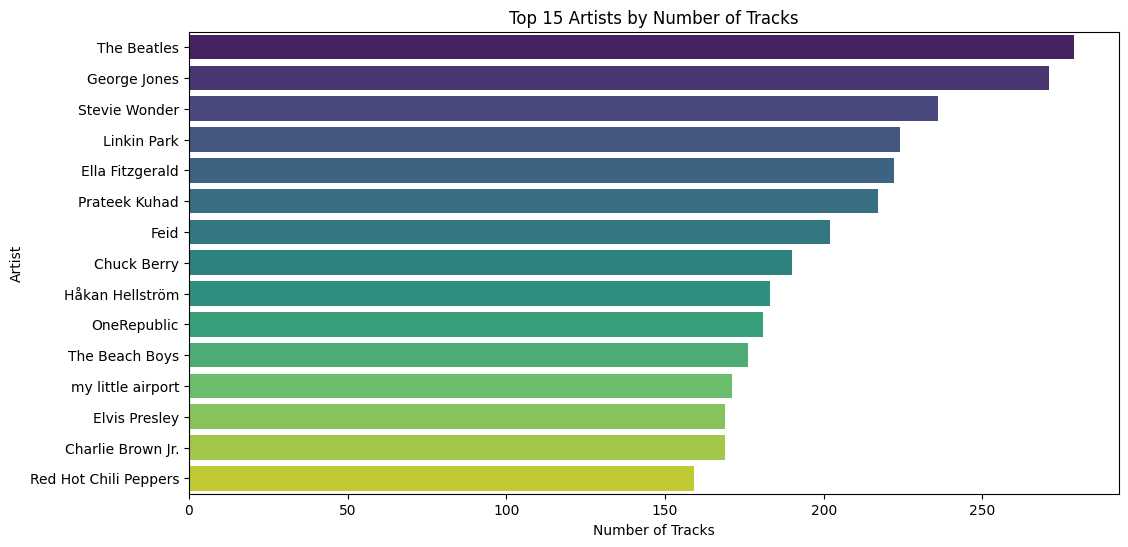

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

top_artists = df['artists'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=top_artists.index, x=top_artists.values, palette='viridis')
plt.title('Top 15 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()


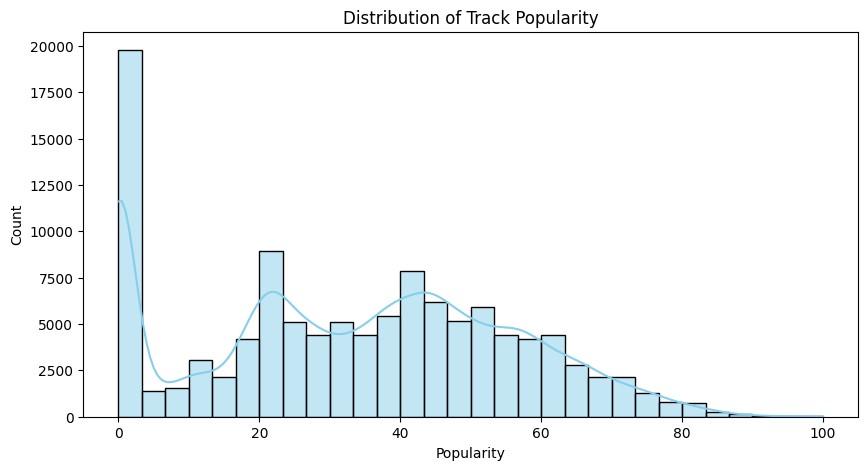

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df['popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


### In summary, this visualization highlights that popularity is unevenly distributed, with a small fraction of tracks being highly popular while the vast majority have minimal popularity. The long tail to the right implies a "winner-takes-most" dynamic common in music streaming platforms.

C:\Users\ija\AppData\Local\Temp\ipykernel_29680\1558743814.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pop = df_top_genres.groupby('track_genre')['popularity'].mean().nlargest(20).sort_values(ascending=False)
C:\Users\ija\AppData\Local\Temp\ipykernel_29680\1558743814.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pop.index, y=avg_pop.values, palette='crest', order=avg_pop.index)  # Explicit order


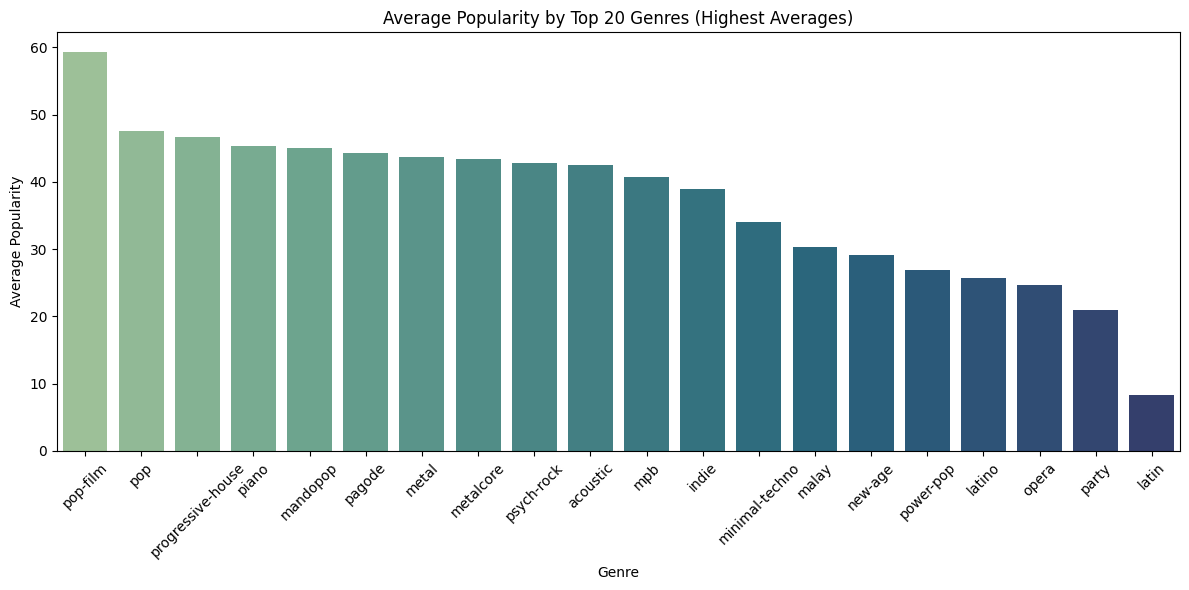

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get top 10 genres by count
top_genres = df['track_genre'].value_counts().nlargest(20).index

# 2. Filter DataFrame to include only top 10 genres
df_top_genres = df[df['track_genre'].isin(top_genres)]

# 3. Group by genre, calculate average popularity, and sort to get top 10 by popularity
avg_pop = df_top_genres.groupby('track_genre')['popularity'].mean().nlargest(20).sort_values(ascending=False)

# 4. Plot only those 10
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_pop.index, y=avg_pop.values, palette='crest', order=avg_pop.index)  # Explicit order
plt.title('Average Popularity by Top 20 Genres (Highest Averages)')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 1. Top 10 genres by number of tracks:

In [33]:
df['track_genre'].value_counts().head(10)


track_genre
acoustic             1000
indie                1000
psych-rock           1000
progressive-house    1000
power-pop            1000
pop-film             1000
pop                  1000
piano                1000
party                1000
pagode               1000
Name: count, dtype: int64

### 2. Top 10 genres by average popularity:

In [34]:
df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)

C:\Users\ija\AppData\Local\Temp\ipykernel_29680\369414671.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)


track_genre
pop-film     59.283000
k-pop        56.952953
chill        53.651000
sad          52.379000
grunge       49.594000
indian       49.539000
anime        48.772000
emo          48.128000
sertanejo    47.866000
pop          47.576000
Name: popularity, dtype: float64

#### Pop and Pop-Film appear in both lists, indicating they are both frequent and popular. 
#### Many of the most frequent genres (like psych-rock, piano, pagode, indie) do not appear among the top popular genres — meaning that being common doesn’t always mean being popular.

#### Conversely, k-pop, chill, and emo are among the most popular on average, despite not being in the top 10 most frequent genre

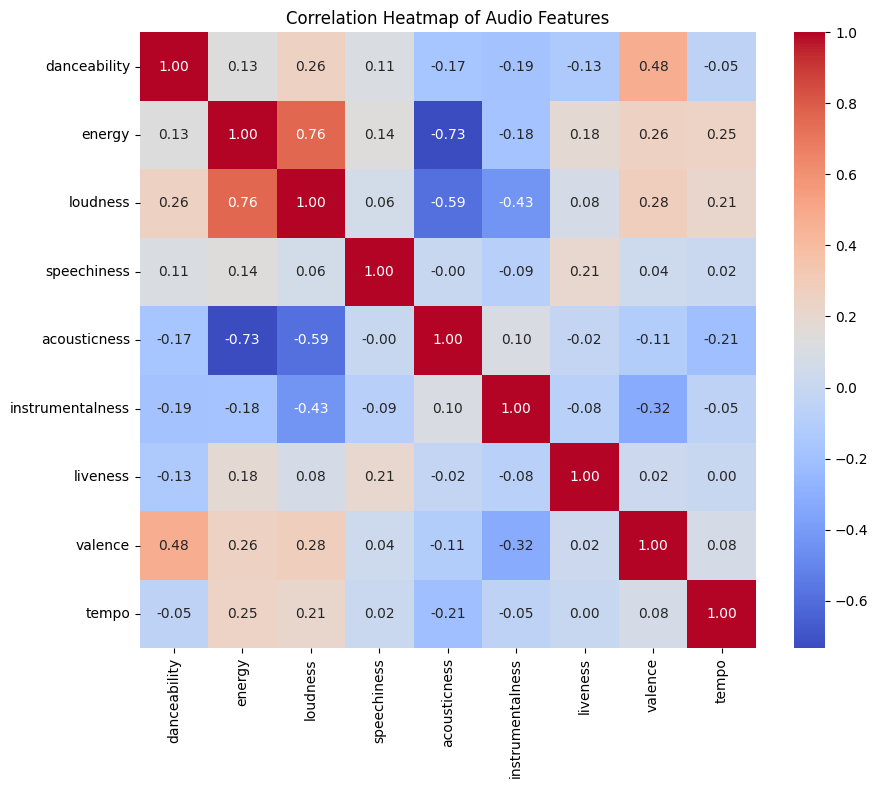

In [35]:
# Select only the numerical audio features you care about
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Compute correlation matrix
corr_matrix = df[audio_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap of Audio Features')
plt.show()
